In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Cleaned_data.csv")

In [5]:
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season


SyntaxError: invalid character '●' (U+25CF) (3760017834.py, line 1)

In [8]:
df.head(1)

,id,url,name,season,number,type,airdate,airtime,runtime,summary,average rating,medium image link,Original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00PM,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


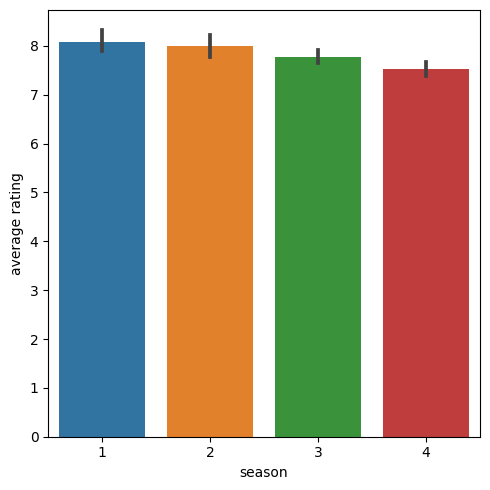

In [19]:
#all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
plt.figure(figsize=(5,5))
sns.barplot(data=df,x="season",y="average rating")
plt.tight_layout()

In [30]:
#all the episode names, whose average rating is more than 8 for every season
df[df["average rating"] > 8].pivot(index="average rating",columns=["season"],values="name") # only seasone 1 and two has episode ratings more then 8

season,1,2
average rating,,
8.4,NaN,Vanishing Point
8.5,The Well-Tempered Clavier,The Passenger
8.6,Trompe L'Oeil,NaN
8.7,The Bicameral Mind,Kiksuya


In [36]:
df.airdate=df.airdate.astype("datetime64[ns]")

In [144]:
# all the episode names that aired before May 2019
from datetime import date,timedelta
da=date(2019,5,1)
df[df.airdate.apply(lambda X: X< pd.Timestamp(da))].name.values

array(['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory',
       'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay',
       'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna',
       'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space',
       'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger'],
      dtype=object)

In [137]:
# Get the episode name from each season with the highest and lowest rating
for i in range(0,4):
    for j in range(0,2):
        b= df.groupby("season")["average rating"].agg(["max","min"]).values[i,j]
        a=list(df[(df.season==i+1) & (df["average rating"] == b)].name)
        if j == 0:
            print(f"From seasone {i+1} with max  rating {b} movie name {a}\n")
        else:
            print(f"From seasone {i+1} with minimum  rating {b} movie name {a}\n")


    



From seasone 1 with max  rating 8.7 movie name ['The Bicameral Mind']

From seasone 1 with minimum  rating 7.6 movie name ['The Stray']

From seasone 2 with max  rating 8.7 movie name ['Kiksuya']

From seasone 2 with minimum  rating 7.6 movie name ['Akane No Mai']

From seasone 3 with max  rating 8.0 movie name ['Parce Domine', 'The Mother of Exiles']

From seasone 3 with minimum  rating 7.5 movie name ['Decoherence', 'Passed Pawn']

From seasone 4 with max  rating 7.8 movie name ['Zhuangzi']

From seasone 4 with minimum  rating 7.1 movie name ['The Auguries']



In [143]:
#Get the summary for the most popular ( ratings ) episode in every season
for i in range(0,4):
        b= df.groupby("season")["average rating"].agg("max").values[i]
        a=df[(df.season==i+1) & (df["average rating"] == b)].summary.values
        print(f"From seasone {i+1} with max rating {b} movie summary {a}\n")


From seasone 1 with max rating 8.7 movie summary ["Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative."]

From seasone 2 with max rating 8.7 movie summary ["Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering."]

From seasone 3 with max rating 8.0 movie summary ["If you're stuck in a loop, try walking in a straight line."
 "The truth doesn't always set you free."]

From seasone 4 with max rating 7.8 movie summary ['God is bored.']

